In [45]:
import pandas as pd
import sys
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor


In [66]:
def find_regression_params(regression_model, samples, cols):
    crime_sample = df.sample(n=samples)

    y = crime_sample[127].values
    X = crime_sample[cols].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    regression_model.fit(X_train, y_train)
    
    return np.hstack((np.array([regression_model.intercept_]), regression_model.coef_))

def plot_hist_se(vals, bins, title, xlabel, ax):
    mean = vals.mean()
    std = vals.std()
    ax.hist(vals, bins=bins, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
    ax.axvline(mean, color='red', label='mean = {0:.2f}'.format(mean))
    ax.axvline(mean - 2 * std, color='green', linestyle='--', label='std = {0:.2f}'.format(std))
    ax.axvline(mean + 2 * std, color='green', linestyle='--')

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.legend(loc='best')


    return ax

In [ ]:
def train_test_split(df, n_samples, validation=False):
    if validation:
        crime_sample = df.sample(n=n_samples)

        nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
        nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)

        msk = np.random.rand(len(nyc_cab_sample)) < 0.8
        non_test = nyc_cab_sample[msk]
        test = nyc_cab_sample[~msk]
        
        msk = np.random.rand(len(non_test)) < 0.7
        train = non_test[msk]
        validation = non_test[~msk]
        
        return train, validation, test
    
    else:
        nyc_cab_sample = df.sample(n=n_samples)

        nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
        nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)

        msk = np.random.rand(len(nyc_cab_sample)) < 0.8
        train = nyc_cab_sample[msk]
        test = nyc_cab_sample[~msk]

        return train, test

In [47]:
comm_data = pd.read_csv("C:/Users/Anthony DePinho/Documents/REU 2017/TRiCAM_BostonAQ/communities_data.csv", header=None)
df = pd.DataFrame(comm_data)

In [48]:
#fix question marks

for c in range(0, df.shape[1]):
    for r in range(0, df.shape[0]):
        if df[c][r] == '?':
            df.set_value(r, c, 0)
            
for c in range(4, 127):
    for r in range(0, 1994):
        if type(df[c][r]) == str:
            df.set_value(r, c, float(df[c][r]))
            
print("done")

done


In [49]:
print(df.head(5))

   0   1      2                    3    4     5     6     7     8     9    \
0    8   0      0         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   0      0          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   0      0         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...    118   119   120   121   122  123  124   125   126   127  
0  ...   0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...   0.02  0.12  0.45     0     0    0    0  0.00     0  0.67  
2  ...   0.01  0.21  0.02     0     0    0    0  0.00     0  0.43  
3  ...   0.02  0.39  0.28     0     0    0    0  0.00     0  0.12  
4  ...   0.04  0.09  0.02     0     0    0    0  0.00     0  0.03  

[5 rows x 128 columns]


In [50]:
#takes out features columns
x = df.iloc[:, 4:126]

#takes of what we want to predict
target = df.iloc[:, 127]

#runs linear regression and returns summary of model

def reg_m(y, x):
    model = sm.OLS(y, x.astype(float)).fit()
    #fits simple ordinary least squares model
    predictions = model.predict(x)
    #makes predictions for y based on x
    return(model.summary())

reg_m(target, x)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    127   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     88.95
Date:                Mon, 03 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:38:03   Log-Likelihood:                 1273.9
No. Observations:                1994   AIC:                            -2304.
Df Residuals:                    1872   BIC:                            -1621.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
4             -0.0013      0.001     -1.254      0.210      -0.003       0.001
5              0.1734      0.402      0.432      0.666      -0.614       0.961
6             -0.0173      0.087     -0.200      0.842      -0.187       0.153
7              0.2056      0.051      4.053      0.000       0.106       0.305
8             -0.0236      0.058     -0.411      0.681      -0.136       0.089
9              0.0007      0.034      0.022      0.983      -0.065       0.067
10             0.0933      0.054      1.741      0.082      -0.012       0.198
11             0.1785      0.104      1.723      0.085      -0.025       0.382
12            -0.0861      0.150     -0.575      0.566      -0.380       0.208
13            -0.2625      0.160     -1.640      0.101      -0.576       0.051
14             0.1597      0.096      1.659      0.097      -0.029       0.349
15            -0.3147      0.390     -0.807      0.420      -1.080       0.451
16             0.0509      0.016      3.222      0.001       0.020       0.082
17            -0.1431      0.173     -0.825      0.409      -0.483       0.197
18            -0.1212      0.086     -1.414      0.158      -0.289       0.047
19             0.0461      0.020      2.286      0.022       0.007       0.086
20            -0.1419      0.066     -2.149      0.032      -0.271      -0.012
21             0.1356      0.107      1.270      0.204      -0.074       0.345
22             0.0254      0.046      0.554      0.580      -0.065       0.115
23            -0.0751      0.036     -2.066      0.039      -0.146      -0.004
24             0.2560      0.161      1.591      0.112      -0.060       0.572
25             0.1094      0.192      0.569      0.570      -0.268       0.486
26            -0.3420      0.156     -2.191      0.029      -0.648      -0.036
27            -0.0335      0.026     -1.313      0.189      -0.084       0.017
28            -0.0333      0.019     -1.712      0.087      -0.071       0.005
29             0.0230      0.019      1.212      0.225      -0.014       0.060
30             0.0447      0.019      2.387      0.017       0.008       0.081
31             0.0315      0.025      1.265      0.206      -0.017       0.080
32             0.0928      0.160      0.578      0.563      -0.222       0.408
33            -0.1341      0.061     -2.187      0.029      -0.254      -0.014
34            -0.1090      0.068     -1.601      0.110      -0.242       0.025
35             0.0829      0.096      0.862      0.389      -0.106       0.271
36             0.0717      0.078      0.923      0.356      -0.081       0.224
37             0.0253      0.041      0.622      0.534      -0.054       0.105
38             0.2940      0.078      3.771      0.000       0.141       0.447
39            -0.0708      0.032     -2.207      0.027      -0.134      -0.008
40

In [51]:
df[df[0] == 36]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
11,36,0,0,RockvilleCentrevillage,1,0.02,0.46,0.08,0.91,0.07,...,0.01,0.63,1.00,0,0,0,0,0.00,0,0.08
16,36,1,1000,Albanycity,1,0.15,0.31,0.40,0.63,0.14,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
69,36,53,54837,Oneidacity,1,0.00,0.39,0.01,0.97,0.03,...,0.06,0.04,0.06,0,0,0,0,0.00,0,0.05
80,36,119,84000,Yonkerscity,1,0.29,0.42,0.27,0.64,0.18,...,0.05,0.87,1.00,0.21,0.14,0.69,0.5,0.61,0.34,0.30
221,36,119,56979,Peekskillcity,2,0.02,0.38,0.41,0.59,0.14,...,0.01,0.38,0.63,0,0,0,0,0.00,0,0.31
315,36,63,51055,NiagaraFallscity,2,0.08,0.30,0.30,0.73,0.01,...,0.04,0.37,0.17,0.04,0.02,0.62,0,0.66,0.16,0.30
343,36,63,53682,NorthTonawandacity,2,0.04,0.40,0.00,0.99,0.02,...,0.03,0.29,0.03,0,0,0,0,0.00,0,0.04
355,36,69,28640,Genevacity,2,0.01,0.45,0.16,0.83,0.06,...,0.01,0.28,0.03,0,0,0,0,0.00,0,0.28
411,36,71,47042,Middletowncity,3,0.02,0.49,0.22,0.73,0.09,...,0.01,0.41,0.17,0,0,0,0,0.00,0,0.20
436,36,65,63418,Romecity,3,0.06,0.53,0.15,0.84,0.08,...,0.22,0.05,0.08,0,0,0,0,0.00,0,0.06


# **Multiple Linear Regression**

In [52]:
#Multiple Linear Regression
crime_sample = df.sample(n=1000, random_state=0)

msk = np.random.rand(len(crime_sample)) < 0.8
train = crime_sample[msk]
test = crime_sample[~msk]

y_train = train[127].values
X_train = train[list(range(4,126))].values

y_test = test[127].values
X_test = test[list(range(4,126))].values

In [53]:
multi_regression_model = LinearRegression(fit_intercept=True, normalize=True)
multi_regression_model.fit(X_train, y_train)

print ('The equation of the regression plane is: {} + {}^T . x'.format(multi_regression_model.intercept_, multi_regression_model.coef_))

The equation of the regression plane is: 0.7353881110767326 + [ -3.23107318e-04  -1.19878642e-01  -1.56356470e-01   2.00793671e-01
  -5.87756316e-02   3.11659721e-02   8.72007682e-02   1.13917000e-01
  -8.62576863e-02  -2.66953815e-01  -6.13603088e-02  -3.01210565e-01
   5.00191207e-02   1.95403360e-01  -1.49087770e-01   2.94046908e-02
  -2.79743071e-01   2.17880499e-01  -1.50238581e-01  -1.38355058e-01
   2.41058703e-01   1.40580463e-01  -4.80010913e-01  -8.19505176e-02
  -8.80849214e-03   2.01432980e-02   5.67184604e-02   8.67784689e-03
   4.80028682e-01  -6.09414230e-02  -1.21095471e-02  -2.15040785e-02
   8.55124557e-02   5.34906746e-02   1.18436000e-01  -5.05596808e-02
   6.33324637e-02   4.97955146e-02  -4.75654171e-02   5.06349937e-01
   3.05969140e-01   2.26143883e-02  -5.10003117e-01  -1.32327165e-01
  -5.30888987e-02  -2.38196483e-01  -5.81481571e-02  -8.94064703e-03
   5.23503527e-02  -1.66161377e-01  -3.50170055e-01   9.19319036e-02
  -5.44482867e-02   6.85086236e-02  -9.12

### Train vs Test Error

In [54]:
train_MSE= np.mean((y_train - multi_regression_model.predict(X_train))**2)
test_MSE= np.mean((y_test - multi_regression_model.predict(X_test))**2)
print ('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = multi_regression_model.score(X_train, y_train)
test_R_sq = multi_regression_model.score(X_test, y_test)
print ('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE is 0.013974302205275721, the test MSE is 0.02179162149295294
The train R^2 is 0.7401689122451234, the test R^2 is 0.5704231892237364


### Uncertainty In Model Parameter Estimates

In [55]:
total_draws = 500
samples = 1000
regression_params = []

for i in range(total_draws):
    if i % 10 == 0:
        out = i * 1. / total_draws * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
        
    regression_params.append(find_regression_params(multi_regression_model, samples, list(range(4,126)) ))
    
sys.stdout.write("\r%d%%" % 100)
regression_params = np.array(regression_params)


100%

In [56]:
print(regression_params)

[[  6.67609186e-01  -3.06214523e-04  -6.87983617e-01 ...,   4.66475945e-02
    1.43950475e-02  -1.77790779e-01]
 [  8.54546900e-01  -3.21632602e-04  -1.34684780e-01 ...,   1.36745938e-01
   -4.63481129e-02   4.77753908e-02]
 [  6.17629525e-01  -1.66596787e-03  -4.28310751e-01 ...,   5.74899373e-02
    2.43388245e-02  -5.48211417e-02]
 ..., 
 [  2.54465019e-01  -4.43400685e-03   1.26838478e+00 ...,  -1.07776597e-01
    2.85552952e-02  -1.54837781e-01]
 [  8.74398627e-01  -5.99576409e-04  -5.44654215e-01 ...,   2.66219537e-03
    3.05287878e-02   5.97425643e-03]
 [  6.41581988e-01  -9.04213916e-04  -2.00656889e-01 ...,  -1.08847363e-01
   -1.35763933e-03  -2.10991727e-05]]


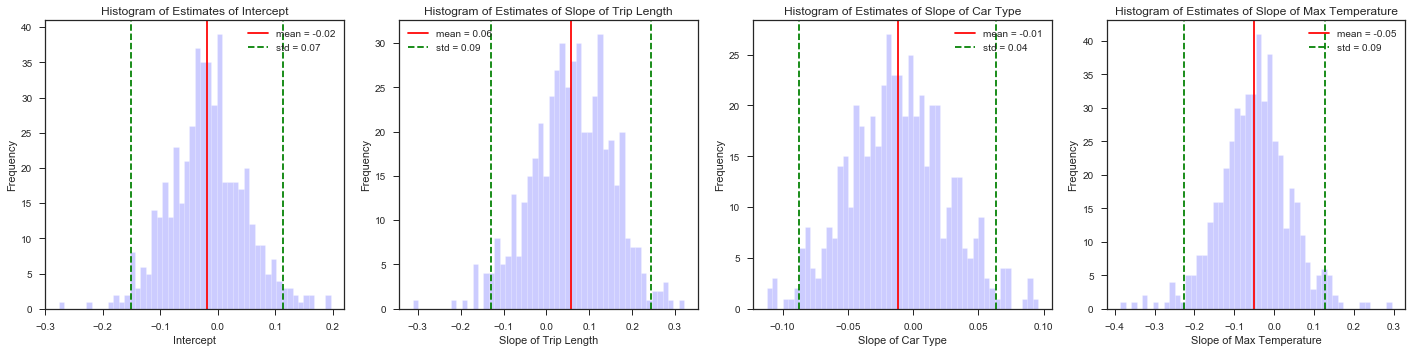

In [57]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
#ignore the labels. only pay attention to the data being visualized and the displays of mean and standard error
ax[0] = plot_hist_se(regression_params[:, 6], 50, 'Histogram of Estimates of Intercept', 'Intercept', ax[0])
ax[1] = plot_hist_se(regression_params[:, 7], 50, 'Histogram of Estimates of Slope of Trip Length', 'Slope of Trip Length', ax[1])
ax[2] = plot_hist_se(regression_params[:, 80], 50, 'Histogram of Estimates of Slope of Car Type', 'Slope of Car Type', ax[2])
ax[3] = plot_hist_se(regression_params[:, 122], 50, 'Histogram of Estimates of Slope of Max Temperature', 'Slope of Max Temperature', ax[3])

plt.tight_layout()
plt.show()

## Evaluating the Significance of Predictors

In [58]:
predictors_multiple = list(range(5, 12))
predictors_simple = list(range(5,12))

X_train_multi = add_constant(train[predictors_multiple].values)
X_test_multi = add_constant(test[predictors_multiple].values)

X_train_simple = add_constant(train[predictors_simple].values)
X_test_simple = add_constant(test[predictors_simple].values)

### Measuring Significance Using F-stat, p-values

In [59]:
multi_regression_model = sm.OLS(y_train, X_train_multi).fit()
print ('F-stat:', multi_regression_model.fvalue)
print ('p-values: {} (intercept), {} (Trip Length), {} (Type), {} (TMAX), {}, {}, {}, {}'.format(*multi_regression_model.pvalues))
print ("AIC:", multi_regression_model.aic)


F-stat: 163.461685142
p-values: 3.244630130531663e-05 (intercept), 0.00019844180640683957 (Trip Length), 2.3718391971251363e-11 (Type), 3.5006739222791305e-09 (TMAX), 0.013153383697582632, 0.3936072945839858, 5.819529155036784e-11, 0.07787768755667995
AIC: -770.139634109


In [60]:
simple_model = LinearRegression(fit_intercept=False)
simple_model.fit(X_train_simple, y_train)

print ("Simple Model: train R^2 = {}, test R^2 = {}".format(simple_model.score(X_train_simple, y_train), simple_model.score(X_test_simple, y_test)))

multiple_model = LinearRegression(fit_intercept=False)
multiple_model.fit(X_train_multi, y_train)

print ("Multiple Predictor Model: train R^2 = {}, test R^2 = {}".format(multiple_model.score(X_train_multi, y_train), multiple_model.score(X_test_multi, y_test)))

Simple Model: train R^2 = 0.5885264289739663, test R^2 = 0.4866594389196375
Multiple Predictor Model: train R^2 = 0.5885264289739663, test R^2 = 0.4866594389196375


In [61]:
multi_regression_model = LinearRegression(fit_intercept=True)

cols = list(range(5,120))
train_R_sq = []
test_R_sq = []
for i in range(1, len(cols) + 1):
    predictors = cols[:i]
    X_train = train[predictors].values
    X_test = test[predictors].values
    
    multi_regression_model.fit(X_train, y_train)
    
    train_R_sq.append(multi_regression_model.score(X_train, y_train))
    test_R_sq.append(multi_regression_model.score(X_test, y_test))
print("done")

done


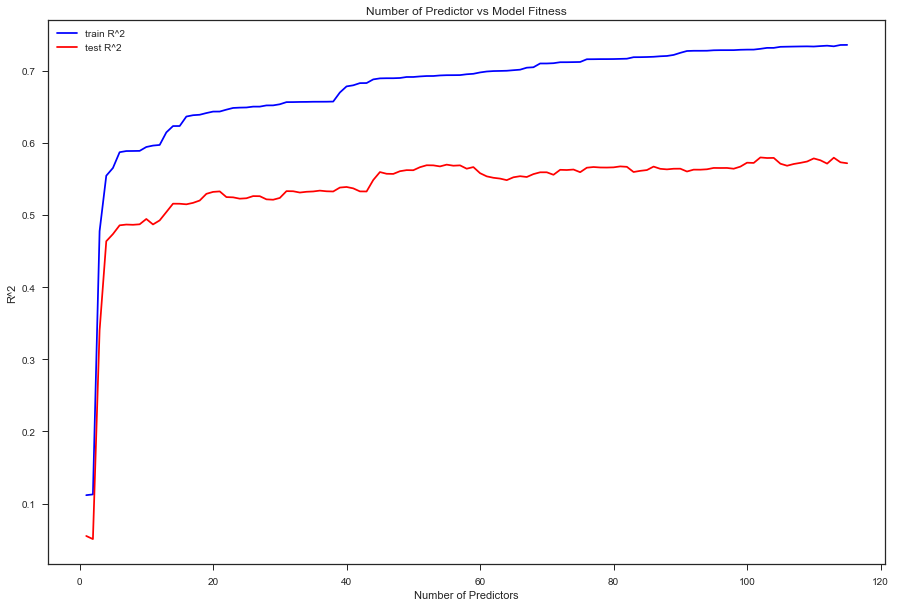

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(range(1, len(cols) + 1), train_R_sq, color='blue', label='train R^2')
ax.plot(range(1, len(cols) + 1), test_R_sq, color='red', label='test R^2')

ax.set_title('Number of Predictor vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('R^2')
ax.legend(loc='best')

plt.show()

# **Interaction Terms**

In [63]:
#Interaction Terms
y_train = train[127].values
X_train = train[[5, 8, 12]].values

y_test = test[127].values
X_test = test[[5,8,12]].values

gen_cross_terms = PolynomialFeatures(degree=3, interaction_only=True)
cross_terms = gen_cross_terms.fit_transform(X_train)
X_train_with_cross = np.hstack((X_train, cross_terms))
cross_terms = gen_cross_terms.fit_transform(X_test)
X_test_with_cross = np.hstack((X_test, cross_terms))

In [64]:
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train_with_cross, y_train)

train_MSE = np.mean((y_train - multi_regression_model.predict(X_train_with_cross))**2)
test_MSE = np.mean((y_test - multi_regression_model.predict(X_test_with_cross))**2)
print ('The train MSE with interaction terms is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = multi_regression_model.score(X_train_with_cross, y_train)
test_R_sq = multi_regression_model.score(X_test_with_cross, y_test)
print ('The train R^2 with interaction terms is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE with interaction terms is 0.026428146066439485, the test MSE is 0.027899752733533
The train R^2 with interaction terms is 0.5086084557985806, the test R^2 is 0.4500139971413675


In [65]:
multi_regression_model.fit(X_train, y_train)

train_MSE = np.mean((y_train - multi_regression_model.predict(X_train))**2)
test_MSE = np.mean((y_test - multi_regression_model.predict(X_test))**2)
print ('The train MSE without interaction terms is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = multi_regression_model.score(X_train, y_train)
test_R_sq = multi_regression_model.score(X_test, y_test)
print ('The train R^2 without interaction terms is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE without interaction terms is 0.026683975501245957, the test MSE is 0.027875632513352903
The train R^2 without interaction terms is 0.5038516930386923, the test R^2 is 0.450489477465929


## Stepwise Selection: For Selecting Number of Useful Features in Data

In [44]:
train, validation, test = train_test_split(df, 5000, validation=True)

y_train = train[127].values
y_val = validation[127].values
y_test = test[127].values

regression_model = LinearRegression(fit_intercept=True)

TypeError: Invalid parameters passed: {'validation': True}